In [12]:
import joblib
import numpy as np
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [13]:
def rmse(y_true, y_predictions): 
    return round(np.sqrt(metrics.mean_squared_error(y_true, y_predictions)), 4)

def rmse_std(y_true, y_predictions): 
    return round(rmse(y_true, y_predictions) / np.std(y_true), 4)

def mae(y_true, y_predictions): 
    return round(metrics.mean_absolute_error(y_true, y_predictions), 4)

def r2(y_true, y_predictions): 
    return round(metrics.r2_score(y_true, y_predictions), 4)

def parity_plot(y_true, y_predictions, title, filename):
    plt.figure(figsize=(6, 6))
    sns.set_style("whitegrid")
    sns.set_context("paper", font_scale=1.5)
    plt.xlim(40, 160)
    plt.ylim(40, 160)
    
    colorscheme = ['red' if abs(true - pred) > 5 else 'darkgreen' for true, pred in zip(y_true, y_predictions)]
    plt.scatter(y_true, y_predictions, c=colorscheme, alpha=0.9, linewidths=2, marker ="o")
    
    plt.plot([40, 160], [40, 160], 'k--', lw=2)
    plt.fill_between([40, 160], [50, 170], [30, 150], color='grey', alpha=0.1)
    plt.xlabel(r'$\Delta E_{DFT}^{\ddag}$', fontsize=16, fontweight='bold')
    plt.ylabel(r'$\Delta E_{ML}^{\ddag}$', fontsize=16, fontweight='bold')

    plt.xticks(fontsize=14, fontweight='bold')
    plt.yticks(fontsize=14, fontweight='bold')
    
    legend_elements = [Line2D([0], [0], color='darkgreen', marker='o', linestyle='', label='Prediction'),
                       Line2D([0], [0], color='black', linestyle='--', lw=2, label='Ideal')]
    plt.legend(handles=legend_elements, frameon=True)

    
    # plt.title(title)
    # plt.legend(["Prediction", "Ideal"], frameon=True)
    
    plt.savefig(filename, dpi=500, bbox_inches='tight')
    plt.show()


def parity_stats_side_by_side(y_left_true,Y_left_predictions,y_right_true,Y_right_predictions,title_left,title_right):
    
    rmse_left = rmse(y_left_true,Y_left_predictions)
    rmse_std_left = rmse_std(y_left_true,Y_left_predictions)
    mae_left = mae(y_left_true,Y_left_predictions)
    r2_left = r2(y_left_true,Y_left_predictions)
    
    rmse_right = rmse(y_right_true,Y_right_predictions)
    rmse_std_right = rmse_std(y_right_true,Y_right_predictions)
    mae_right = mae(y_right_true,Y_right_predictions)
    r2_right = r2(y_right_true,Y_right_predictions)
    
    stats_df = pd.DataFrame({'Error Metric' : ['RMSE', 'RMSE/std', 'MAE', 'R2'], 
                             title_left : [str(rmse_left) + " (kJ/mol)", rmse_std_left, str(mae_left) + " (kJ/mol)", r2_left],
                             title_right: [str(rmse_right) + " (kJ/mol)", rmse_std_right, str(mae_right) + " (kJ/mol)", r2_right],
                             'Note' : ['(0.0 for perfect prediction)', '(0.0 for perfect prediction)','(0.0 for perfect prediction)','(1.0 for perfect prediction)']})
    return stats_df



Catalyst: 7_och3_no2, DFT: 74.4, Predicted: 71.81058914350318, Difference: -2.5894108564968263
Catalyst: iminch32, DFT: 94.0, Predicted: 89.60240678326328, Difference: -4.397593216736723
Catalyst: 1C_7, DFT: 53.3, Predicted: 56.93751813238503, Difference: 3.6375181323850327
Catalyst: 2C_19, DFT: 79.7, Predicted: 74.91373101485962, Difference: -4.7862689851403815
Catalyst: DA2_th_th, DFT: 79.7, Predicted: 81.98766377202563, Difference: 2.287663772025624


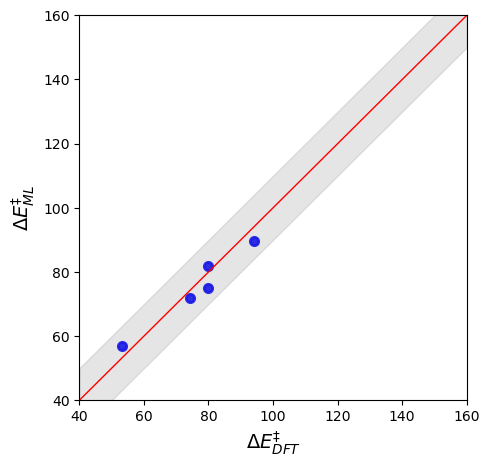

R2: 0.9224187339997588
MAE: 3.5396909925569178


In [14]:
# Load the model from the file
gbr_model = joblib.load('gbr_model.pkl')

df2 = pd.read_csv('DataTest.csv')
df2['theta12'] = df2['theta1'] + df2['theta2']
# Prepare the features for prediction
features_df2 = df2.drop([ 'Folder', 'Barrier', 'theta1', 'theta2'], axis=1)

# Make predictions
predictions_test12 = gbr_model.predict(features_df2)

# Calculate differences
differences = predictions_test12 - df2['Barrier']

# Print Folder, Actual, Predicted, and Difference
for folder, actual, predicted, difference in zip(df2['Folder'], df2['Barrier'], predictions_test12, differences):
    print(f"Catalyst: {folder}, DFT: {actual}, Predicted: {predicted}, Difference: {difference}")

# Plotting
plt.style.use('default')
plt.figure(figsize=(5, 5))
plt.scatter(df2['Barrier'], predictions_test12, color='blue', alpha=0.9, linewidths=2, marker ="o")
plt.plot([40, 160], [40, 160], color='red', linestyle='-', linewidth=1, markersize=12)
plt.xlim(40, 160)
plt.ylim(40, 160)
plt.fill_between([40, 160], [50, 170], [30, 150], color='grey', alpha=0.2)
plt.xlabel(r'$\Delta E_{DFT}^{\ddag}$', fontsize=14)
plt.ylabel(r'$\Delta E_{ML}^{\ddag}$', fontsize=14)
plt.show()

# Calculate R2 and MAE
r2 = r2_score(df2['Barrier'], predictions_test12)
mae = mean_absolute_error(df2['Barrier'], predictions_test12)

print('R2:', r2)
print('MAE:', mae)
